Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

In [1]:
airbnb<-read.csv('airbnb-listings.csv',sep = ';')
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [2]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
airbnb_filter <- select(airbnb, c('City','Room.Type','Neighbourhood','Accommodates','Bathrooms',
                          'Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People',
                          'Review.Scores.Rating','Latitude', 'Longitude'))

Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [4]:
df_madrid = airbnb_filter %>% 
    filter(Room.Type=="Entire home/apt" & City=="Madrid" & Neighbourhood!="")

borrar <- c("City","Room.Type")
df_madrid <- df_madrid[ , !(names(df_madrid) %in% borrar)]

set.seed(123)

In [5]:
head(df_madrid)
summary(df_madrid)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,Palacio,2,1,1,1,85,NA,1,0,95,40.41697,-3.709439
2,Malasaña,4,1,1,2,112,NA,2,5,99,40.42319,-3.711249
3,Palacio,8,3,3,4,190,NA,6,40,96,40.41651,-3.717843
4,La Latina,2,1,1,1,71,NA,1,0,90,40.41200,-3.706691
5,Embajadores,2,NA,1,NA,34,NA,1,6,88,40.40809,-3.700322
6,Embajadores,3,1,0,2,60,NA,1,0,100,40.41085,-3.701099


 Neighbourhood       Accommodates      Bathrooms        Bedrooms     
 Length:5601        Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Class :character   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 Mode  :character   Median : 4.000   Median :1.000   Median : 1.000  
                    Mean   : 4.101   Mean   :1.248   Mean   : 1.453  
                    3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
                    Max.   :16.000   Max.   :6.500   Max.   :10.000  
                                     NA's   :14      NA's   :7       
      Beds            Price         Square.Feet     Guests.Included 
 Min.   : 1.000   Min.   : 10.00   Min.   :   0.0   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 56.00   1st Qu.:   0.0   1st Qu.: 1.000  
 Median : 2.000   Median : 75.00   Median : 237.0   Median : 2.000  
 Mean   : 2.393   Mean   : 88.74   Mean   : 392.6   Mean   : 1.952  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 646.0   3rd Qu.: 2.000  
 Max.   :16.000   Max.   :

Crea una nueva columna llamada Square.Meters a partir de Square.Feet. Recuerda que un pie cuadrado son 0.092903 metros cuadrados.

In [6]:
df_madrid$Square.Meters <- df_madrid$Square.Feet * 0.092903
borrar <- c("Square.Feet")
df_madrid <- df_madrid[ , !(names(df_madrid) %in% borrar)]

¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [7]:
nrow(df_madrid %>% filter(is.na(df_madrid$Square.Meters)))*100/nrow(df_madrid)

[1] 93.80468

De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [8]:
nrow(df_madrid %>% filter(df_madrid$Square.Meters==0))*100/nrow(df_madrid %>% filter(!is.na(df_madrid$Square.Meters)))

[1] 36.88761

Reemplazar todos los 0m^2 por NA 

In [9]:
df_madrid$Square.Meters[df_madrid$Square.Meters==0] <- NA 

In [10]:
summary(df_madrid$Square.Meters)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  2.044  30.008  49.982  57.788  74.973 480.030    5382 

In [11]:
nrow(df_madrid %>% filter(is.na(df_madrid$Square.Meters)))*100/nrow(df_madrid)

[1] 96.08998

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA. Pero antes de eso deberíamos pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más, además crearemos una variable sintética nueva basada en la similitud entre barrios.

Warning message:
“Removed 5382 rows containing non-finite values (stat_bin).”


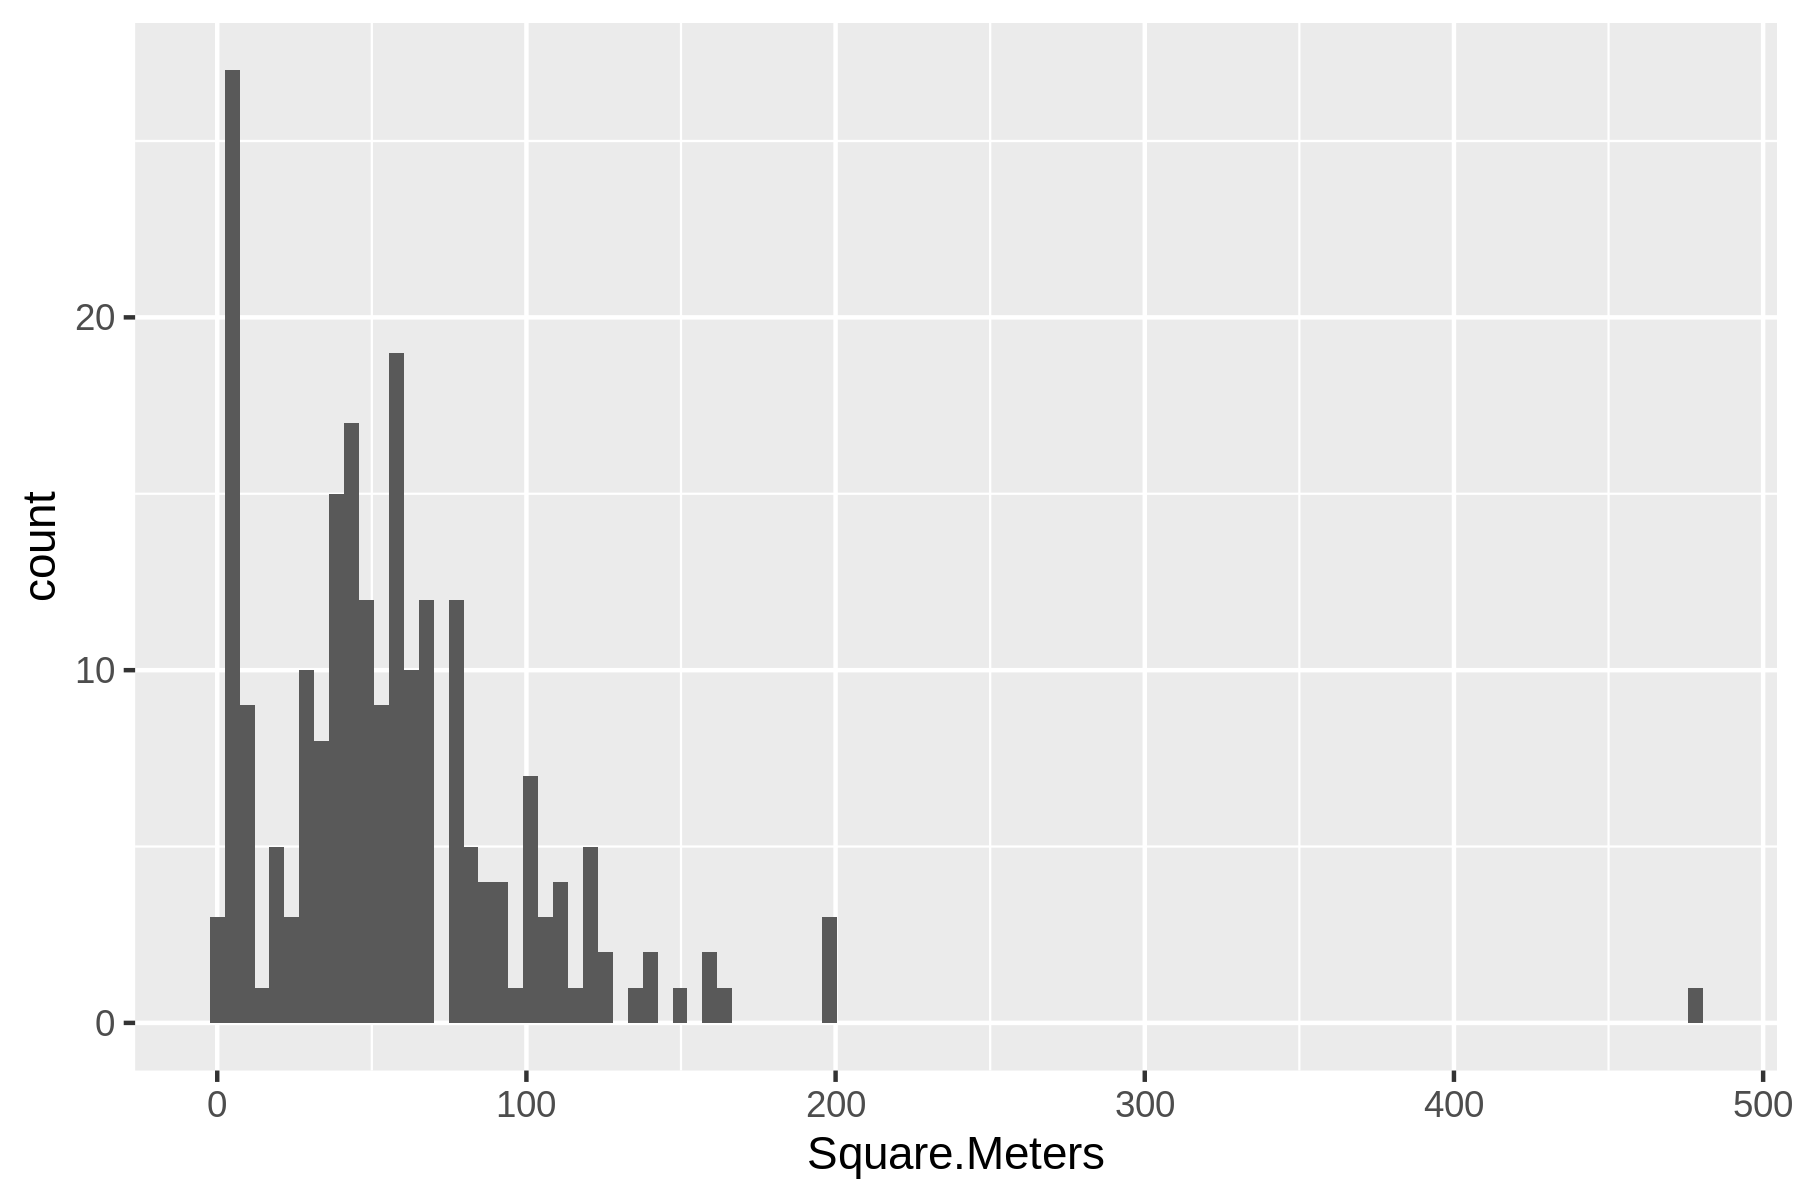

In [12]:
df_madrid %>% ggplot(aes(x=Square.Meters))+geom_histogram(bins=100)

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

In [13]:
df_madrid$Square.Meters[df_madrid$Square.Meters<20] <- NA

Existen varios Barrios que todas sus entradas son NA, vamos a eliminar del dataset todos los pisos que pertenecen a estos barrios.

In [14]:
neighb_all_na <- df_madrid %>% group_by(Neighbourhood) %>% 
  summarise(num_na=sum(is.na(Square.Meters))/length(Square.Meters)) %>% 
  filter(num_na==1) %>% select(Neighbourhood)

In [15]:
sum(apply(df_madrid,1,function(x) any(is.na(x))))

[1] 5436

In [16]:
dim(df_madrid[,c("Neighbourhood","Square.Meters")])
unique(na.omit(df_madrid[,c("Neighbourhood","Square.Meters")])$Neighbourhood)

[1] 5601    2

[1] "Sol"              "Cuatro Caminos"   "Pacifico"         "Palacio"         
 [5] "Justicia"         "Malasaña"         "Castellana"       "Castilla"        
 [9] "Embajadores"      "La Latina"        "Carabanchel"      "Trafalgar"       
[13] "Barajas"          "Rios Rosas"       "El Tréntaiseis"   "Acacias"         
[17] "Cortes"           "Recoletos"        "Argüelles"        "Almenara"        
[21] "Lista"            "San Blas"         "Chamberí"         "Ciudad Jardin"   
[25] "Ciudad Lineal"    "Almagro"          "Goya"             "Adelfas"         
[29] "Centro"           "Usera"            "Arapiles"         "El Viso"         
[33] "Retiro"           "Fuente del Berro" "Palos do Moguer"  "Jerónimos"       
[37] "Vicálvaro"        "Moratalaz"

In [17]:
neighb_all_na <- df_madrid %>% group_by(Neighbourhood) %>% 
  summarise(num_na=sum(is.na(Square.Meters))/length(Square.Meters)) %>% 
  filter(num_na==1) %>% select(Neighbourhood)
df_madrid <- df_madrid[!df_madrid$Neighbourhood %in% neighb_all_na$Neighbourhood,]
paste("Quedan ",length(unique(df_madrid$Neighbourhood)),"barrios")
dim(df_madrid)

[1] "Quedan  38 barrios"

[1] 4901   12

In [18]:
head(df_madrid)
summary(df_madrid, n=15)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,Palacio,2,1,1,1,85,1,0,95,40.41697,-3.709439,NA
2,Malasaña,4,1,1,2,112,2,5,99,40.42319,-3.711249,NA
3,Palacio,8,3,3,4,190,6,40,96,40.41651,-3.717843,NA
4,La Latina,2,1,1,1,71,1,0,90,40.41200,-3.706691,NA
5,Embajadores,2,NA,1,NA,34,1,6,88,40.40809,-3.700322,NA
6,Embajadores,3,1,0,2,60,1,0,100,40.41085,-3.701099,NA


 Neighbourhood       Accommodates      Bathrooms        Bedrooms    
 Length:4901        Min.   : 1.000   Min.   :0.000   Min.   : 0.00  
 Class :character   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.00  
 Mode  :character   Median : 4.000   Median :1.000   Median : 1.00  
                    Mean   : 4.091   Mean   :1.244   Mean   : 1.42  
                    3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.00  
                    Max.   :16.000   Max.   :6.000   Max.   :10.00  
                                     NA's   :14      NA's   :7      
      Beds            Price        Guests.Included   Extra.People    
 Min.   : 1.000   Min.   : 18.00   Min.   : 1.000   Min.   :  0.000  
 1st Qu.: 1.000   1st Qu.: 59.00   1st Qu.: 1.000   1st Qu.:  0.000  
 Median : 2.000   Median : 75.00   Median : 2.000   Median : 10.000  
 Mean   : 2.366   Mean   : 90.39   Mean   : 1.954   Mean   :  9.019  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 2.000   3rd Qu.: 15.000  
 Max.   :16.000   Max.   :80

El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

In [19]:
install.packages('reshape2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




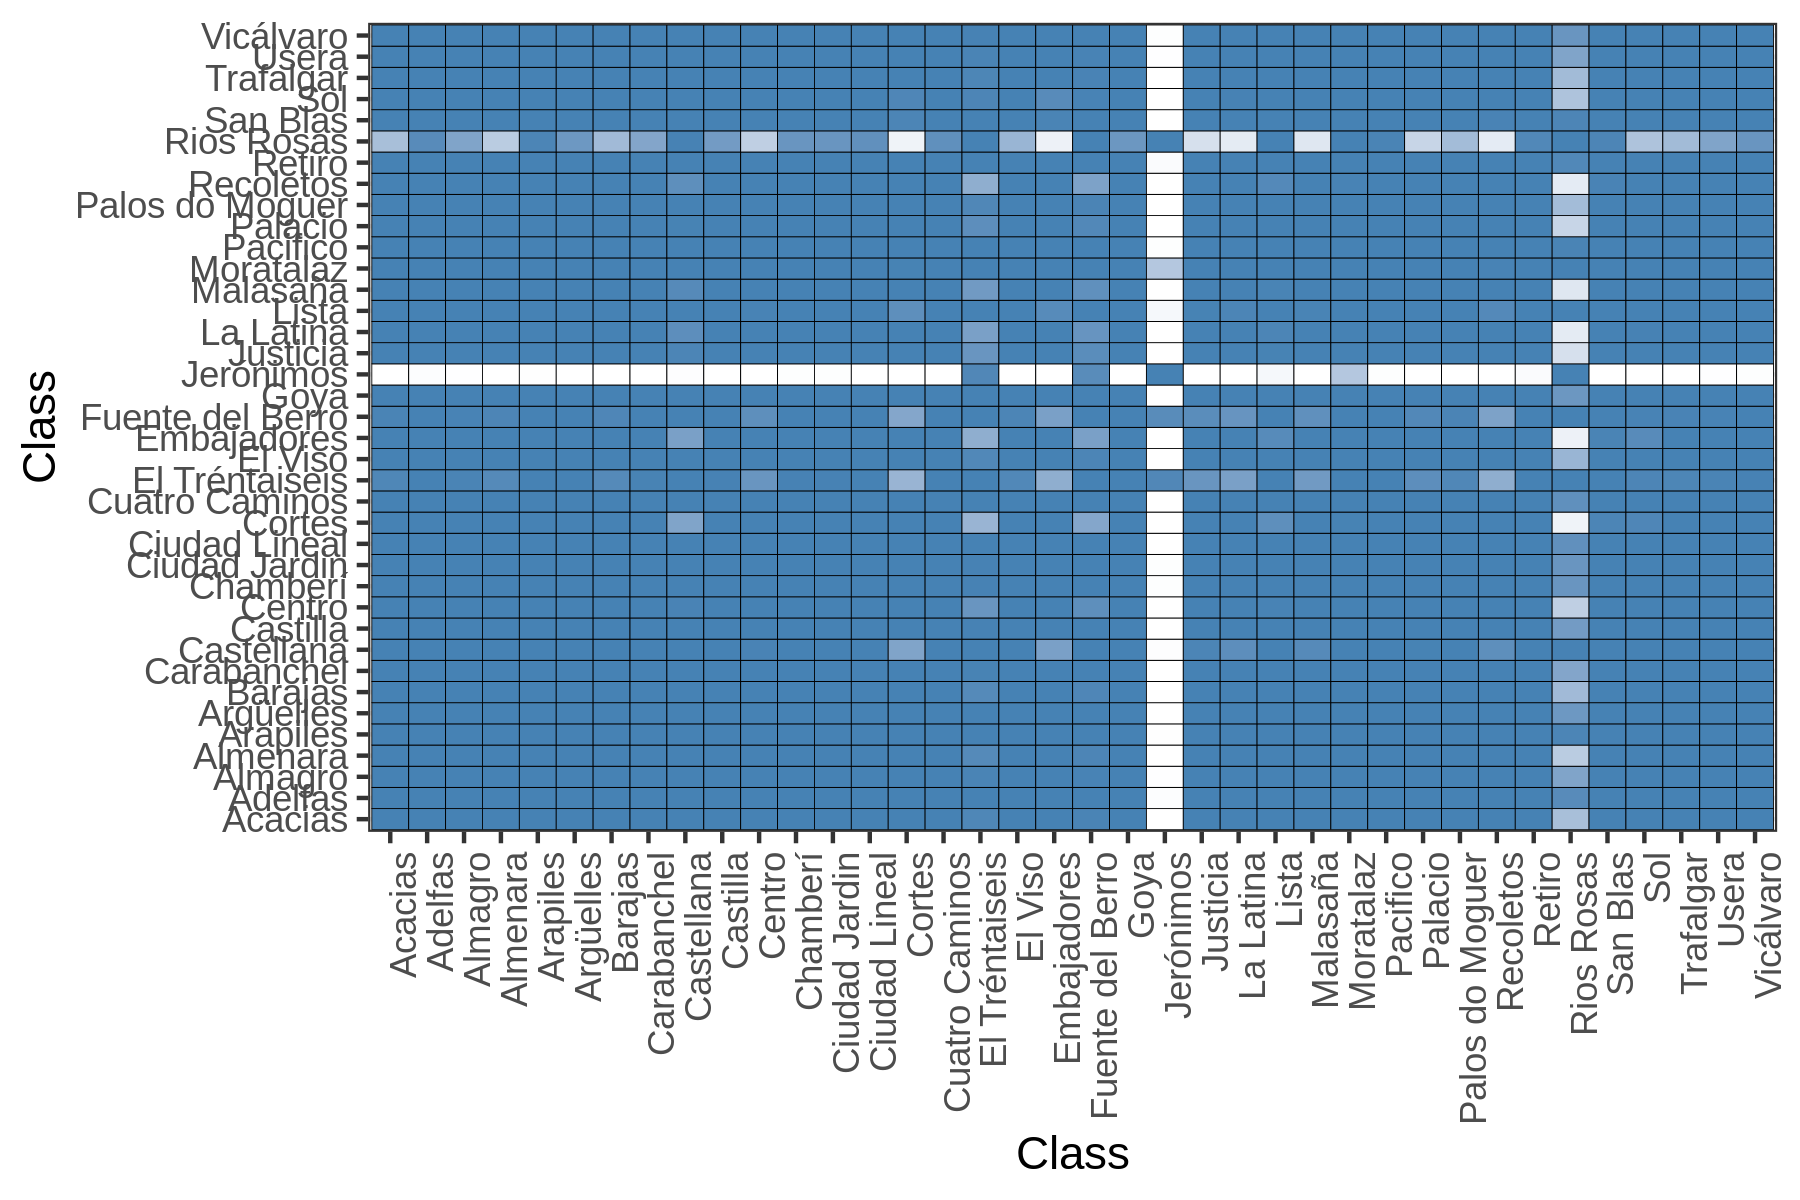

In [20]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


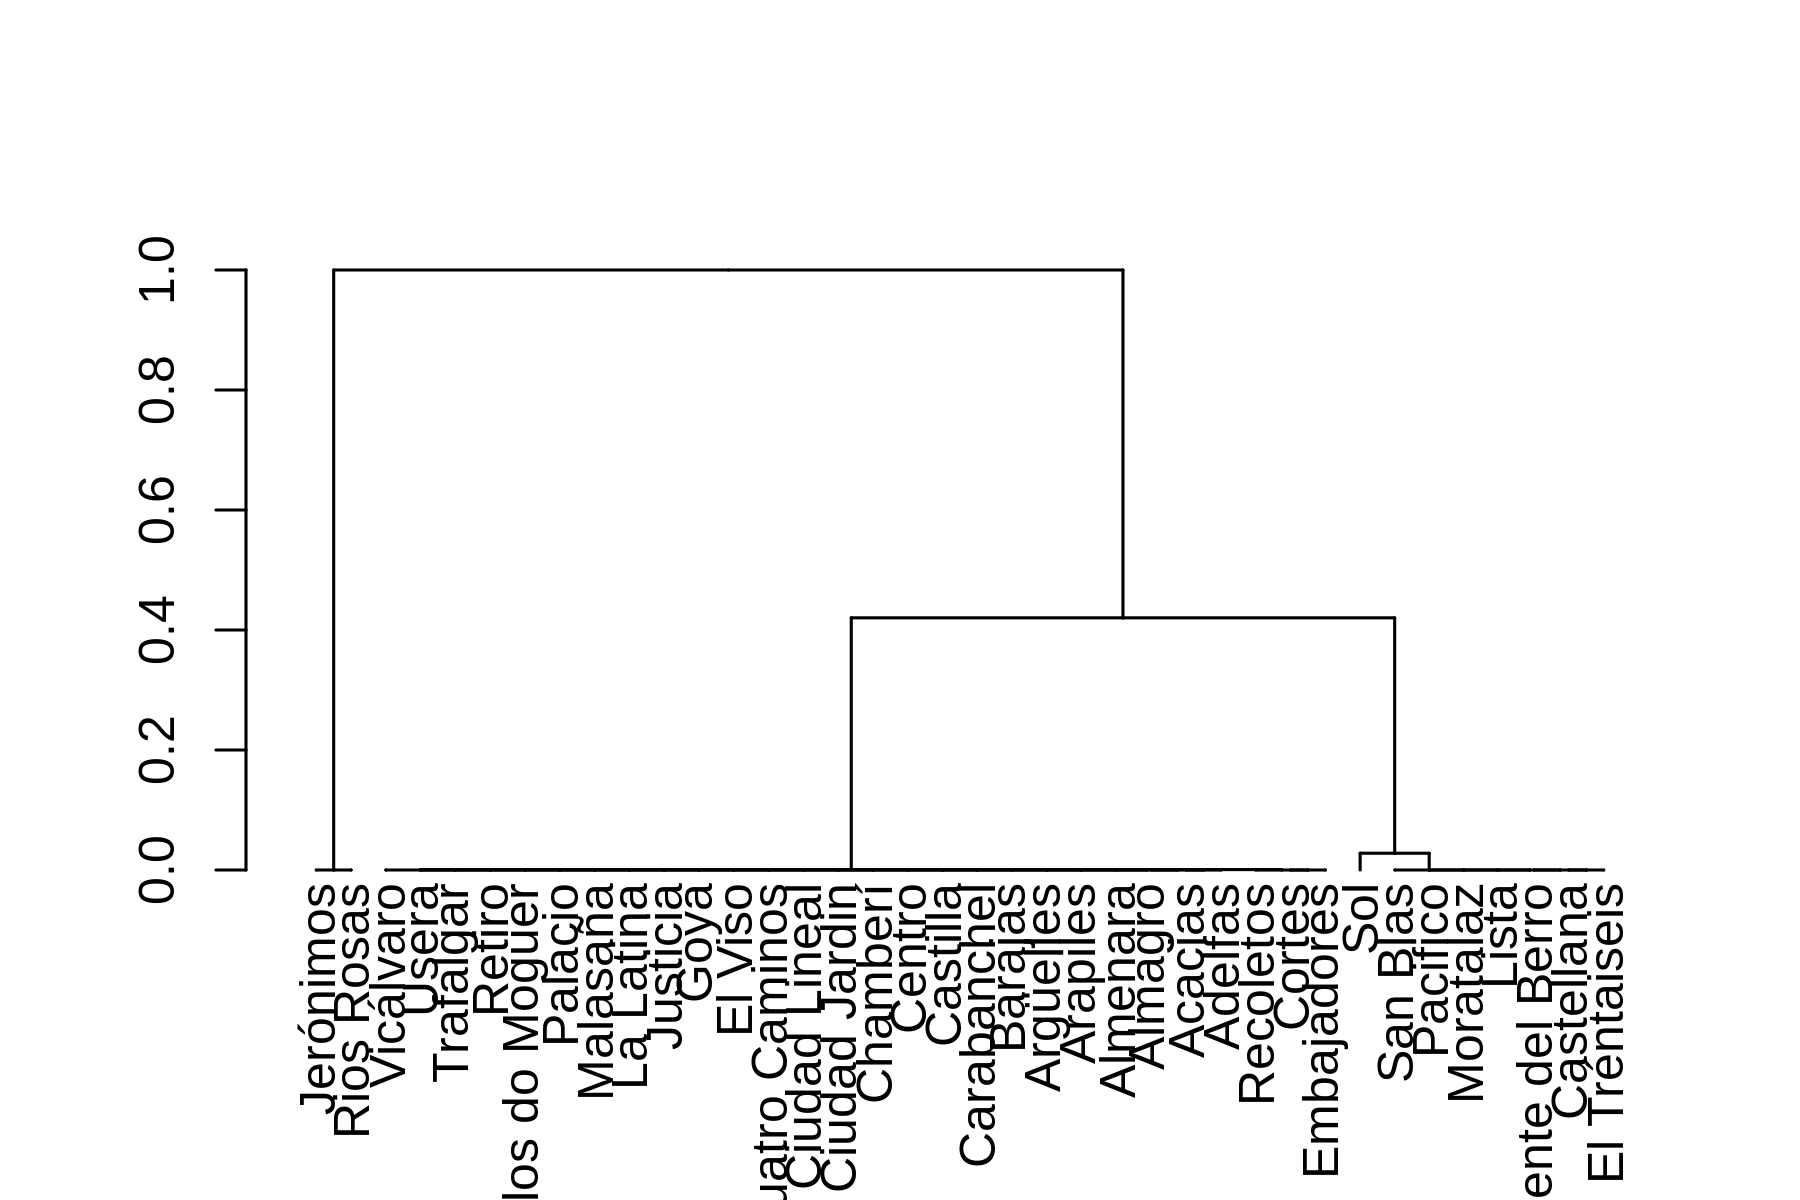

In [21]:
d <- as.dist(1-resm)
hc <- hclust(d,method="complete")
hcd <- as.dendrogram(hc)
plot(hcd)

¿Que punto de corte sería el aconsejable?, ¿cuantos clusters aparecen?

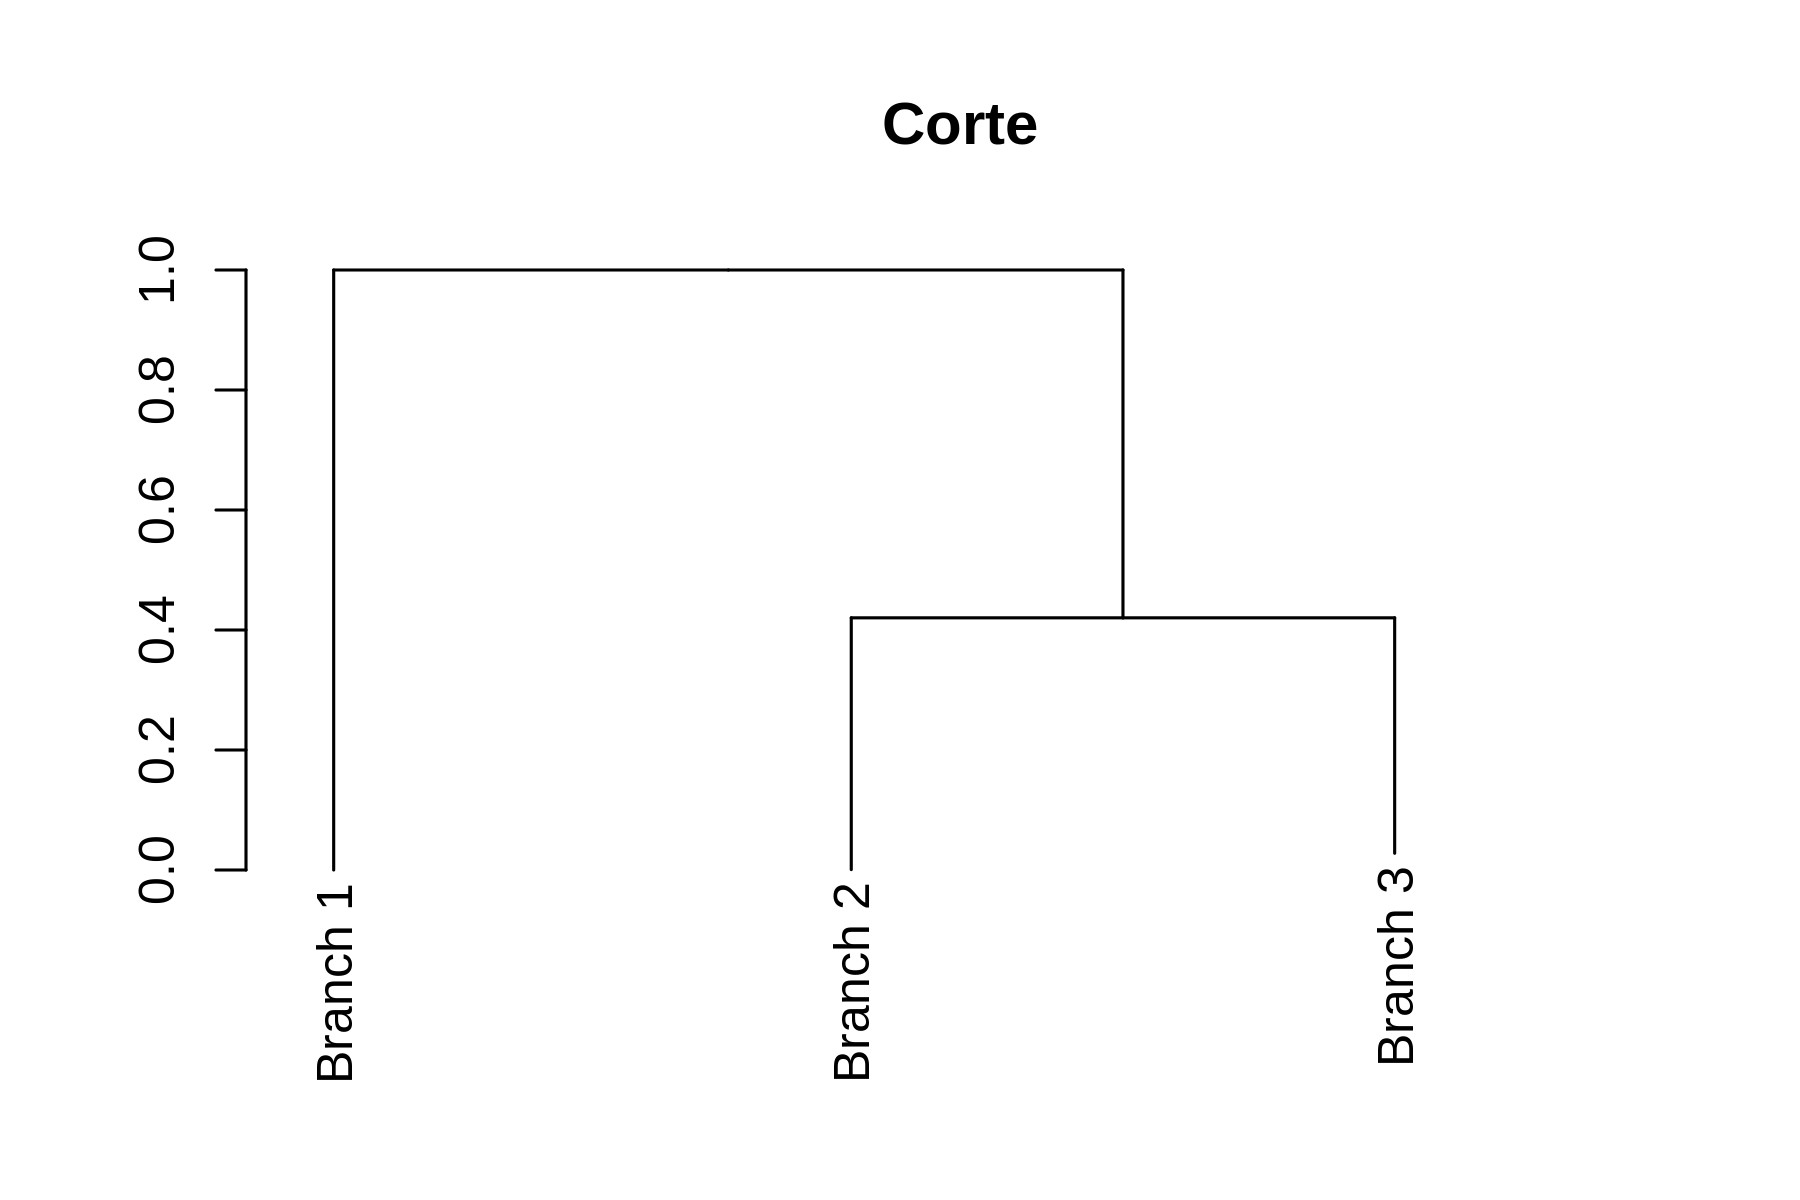

In [22]:
plot(cut(hcd, h = 0.2)$upper, main = "Corte", cex=1)

Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [23]:
treecuts <- cutree(hc,h=0.2)
treecuts.f <- factor(treecuts)

In [24]:
df_treecuts <- as.data.frame(treecuts.f, col.names = names(c("Neighbourhood", "neighb_id")))
df_treecuts <- cbind(Neighbourhood = rownames (df_treecuts),df_treecuts)
rownames(df_treecuts) <- NULL
colnames (df_treecuts)[2] <- "neighb_id"
head(df_treecuts)

,Neighbourhood,neighb_id
,<chr>,<fct>
1,Acacias,1
2,Adelfas,1
3,Almagro,1
4,Almenara,1
5,Arapiles,1
6,Argüelles,1


In [25]:
df_madrid_2 <- merge (df_treecuts, df_madrid, by = "Neighbourhood")
df_madrid_2 <- df_madrid_2 %>% filter(!is.na(Square.Meters))

Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [26]:
table(df_madrid_2$neighb_id)
head(df_madrid_2)


  1   2   3 
130  41   3 

,Neighbourhood,neighb_id,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<chr>,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,Acacias,1,4,1.0,1,3,68,2,10,90,40.39691,-3.705202,74.97272
2,Acacias,1,4,1.0,1,2,60,2,15,98,40.40513,-3.707726,49.98181
3,Acacias,1,4,1.0,1,2,60,2,12,85,40.40073,-3.706203,69.95596
4,Adelfas,1,6,1.5,2,6,60,2,15,94,40.39912,-3.670071,69.95596
5,Almagro,1,4,1.0,1,2,75,2,10,92,40.43825,-3.693876,49.98181
6,Almenara,1,4,1.0,0,1,52,2,0,53,40.47226,-3.692849,40.04119


In [27]:
set.seed(123)
idx<-sample(1:nrow(df_madrid_2),nrow(df_madrid_2)*0.7)
df_train<-df_madrid_2[idx,]
df_test<-df_madrid_2[-idx,]

In [28]:
model <- lm(formula=Square.Meters~neighb_id+neighb_id+Price+Bedrooms, data=df_train)
summary(model)


Call:
lm(formula = Square.Meters ~ neighb_id + neighb_id + Price + 
    Bedrooms, data = df_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.594 -13.026  -2.741   8.977  85.875 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 22.25338    3.78529   5.879 4.12e-08 ***
neighb_id2  11.08396    4.53197   2.446  0.01597 *  
neighb_id3  43.97636   15.06746   2.919  0.00423 ** 
Price        0.05261    0.02573   2.045  0.04315 *  
Bedrooms    23.44602    2.24540  10.442  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.86 on 115 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.6467,	Adjusted R-squared:  0.6344 
F-statistic: 52.63 on 4 and 115 DF,  p-value: < 2.2e-16


In [29]:
install.packages('caret')
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [30]:
caret::postResample(predict(model,df_train),obs = df_train$Square.Meters)
caret::postResample(predict(model,df_test),obs = df_test$Square.Meters)
#No se aprecia overfitting en el modelo

RMSE   Rsquared        MAE 
20.4236200  0.6467346 14.9882942

RMSE   Rsquared        MAE 
42.6954517  0.6666797 19.8093103

Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

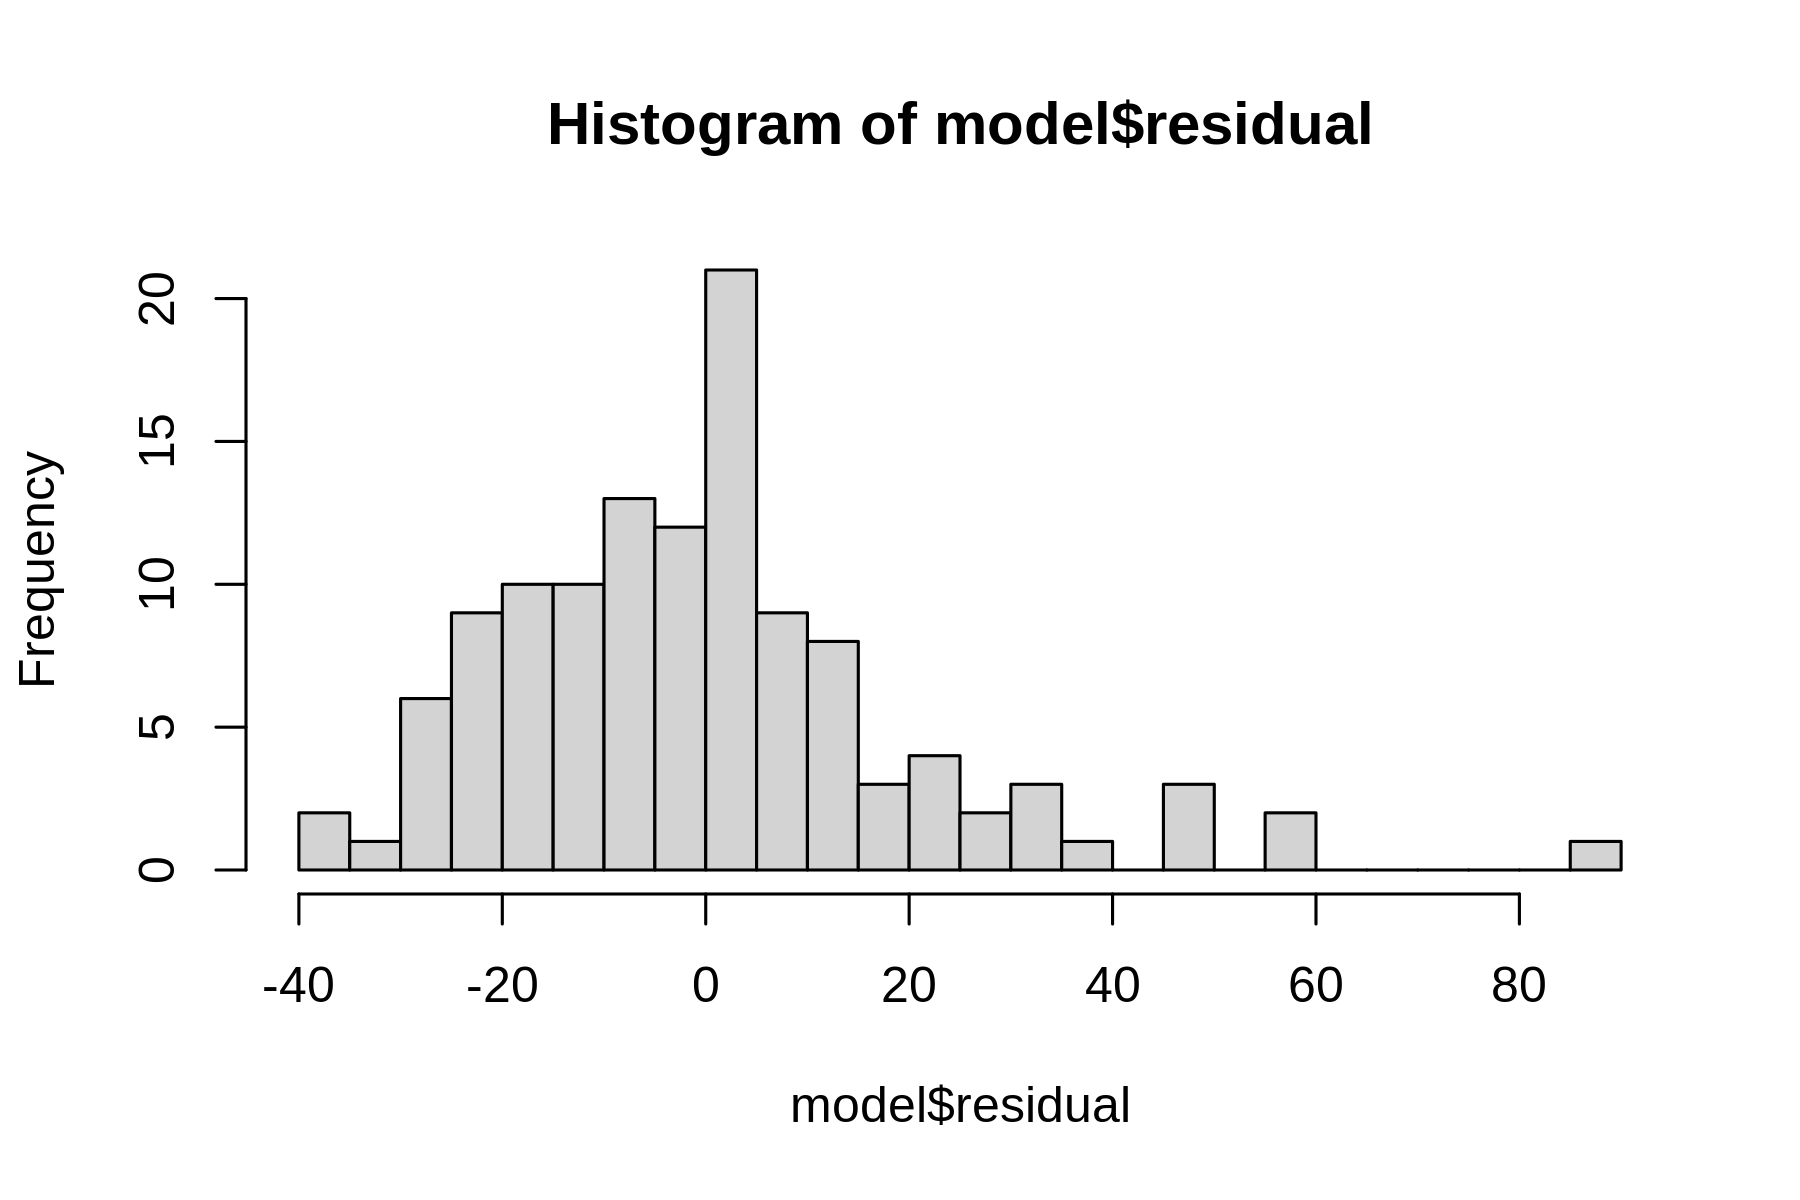

In [31]:
hist(model$residual,breaks=20)

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates) con un precio de 80€/noche y 3 habitaciones en el barrio de Sol.
¿Cuantos metros cuadrados tendría?
¿Como varía sus metros cuadrados con cada habitación adicional?

In [32]:
neighb_id_sol<-df_treecuts %>% filter(Neighbourhood=="Sol") %>% select(neighb_id)
df_appartment<-data.frame(neighb_id=neighb_id_sol$neighb_id,Bedrooms=3,Price=80,Accommodates=6)
prediction<-predict(model,df_appartment)
paste("Los metros cuadrados son:",round(prediction))

[1] "Los metros cuadrados son: 108"

In [33]:
paste("En media cada habitación aumenta el tamaño del apartemos en:",round(model$coefficients["Bedrooms"],2),"m^2")

[1] "En media cada habitación aumenta el tamaño del apartemos en: 23.45 m^2"

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [34]:
#df_madrid_2$Square.Meters[df_madrid$Square.Meters==NA] <- prediction
df_madrid_2$Square.Meters[is.na(df_madrid_2$Square.Meters)]<-
 round(predict(model,df_madrid_2[is.na(df_madrid_2$Square.Meters),]))

In [35]:
head(df_madrid_2)

,Neighbourhood,neighb_id,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<chr>,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,Acacias,1,4,1.0,1,3,68,2,10,90,40.39691,-3.705202,74.97272
2,Acacias,1,4,1.0,1,2,60,2,15,98,40.40513,-3.707726,49.98181
3,Acacias,1,4,1.0,1,2,60,2,12,85,40.40073,-3.706203,69.95596
4,Adelfas,1,6,1.5,2,6,60,2,15,94,40.39912,-3.670071,69.95596
5,Almagro,1,4,1.0,1,2,75,2,10,92,40.43825,-3.693876,49.98181
6,Almenara,1,4,1.0,0,1,52,2,0,53,40.47226,-3.692849,40.04119


Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [36]:
df_PCA = na.omit(df_madrid_2[,c("Accommodates","Bathrooms","Bedrooms","Latitude","Longitude","Beds","Price","Review.Scores.Rating","Square.Meters")])

In [37]:
PCA<-prcomp(df_PCA,center = TRUE, scale. = TRUE)

In [38]:
 summary(df_PCA)

  Accommodates      Bathrooms        Bedrooms        Latitude    
 Min.   : 2.000   Min.   :1.000   Min.   :0.000   Min.   :40.38  
 1st Qu.: 3.000   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:40.41  
 Median : 4.000   Median :1.000   Median :1.000   Median :40.42  
 Mean   : 4.491   Mean   :1.288   Mean   :1.576   Mean   :40.42  
 3rd Qu.: 6.000   3rd Qu.:1.000   3rd Qu.:2.000   3rd Qu.:40.43  
 Max.   :16.000   Max.   :5.000   Max.   :5.000   Max.   :40.48  
   Longitude           Beds            Price       Review.Scores.Rating
 Min.   :-3.732   Min.   : 1.000   Min.   : 30.0   Min.   : 50.00      
 1st Qu.:-3.707   1st Qu.: 1.000   1st Qu.: 60.0   1st Qu.: 88.00      
 Median :-3.703   Median : 2.000   Median : 75.0   Median : 93.00      
 Mean   :-3.698   Mean   : 2.679   Mean   : 93.3   Mean   : 90.44      
 3rd Qu.:-3.698   3rd Qu.: 3.000   3rd Qu.:100.0   3rd Qu.: 95.00      
 Max.   :-3.576   Max.   :13.000   Max.   :500.0   Max.   :100.00      
 Square.Meters   
 Min.   : 22.02 

In [59]:
get_closest_element<-function(PCA, new_flat){
    pca_new<-predict(PCA, newdata = new_flat)
    pca_orig<-PCA$x[,1:2]
    pca_new <-pca_new[,1:2]

    idx<-order(rowSums((pca_new-pca_orig)^2))
    df_PCA[idx %in% 1:5,]
}

In [61]:
new_flat<-df_PCA[10,]
new_flat
get_closest_element(PCA,new_flat)

,Accommodates,Bathrooms,Bedrooms,Latitude,Longitude,Beds,Price,Review.Scores.Rating,Square.Meters
,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>
10,6,2,1,40.47335,-3.691577,2,67,73,60.01534


,Accommodates,Bathrooms,Bedrooms,Latitude,Longitude,Beds,Price,Review.Scores.Rating,Square.Meters
,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>
7,4,1.0,0,40.47221,-3.693440,1,52,72,44.96505
18,5,1.0,1,40.39268,-3.712169,3,32,81,54.99858
109,5,2.5,3,40.42308,-3.705691,3,73,96,99.96363
128,5,1.0,1,40.41707,-3.708815,1,62,100,49.98181
134,3,1.0,1,40.40588,-3.696310,2,85,97,60.38695


Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?